<a href="https://colab.research.google.com/github/Nihal-18/ML/blob/master/Exp_031120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: NIHAL M TODANKAR

Roll NO: J058

B.Tech Data Science

J3

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [77]:
df= pd.read_csv('/content/drive/My Drive/php8Mz7BG.csv')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      5404 non-null   float64
 1   V2      5404 non-null   float64
 2   V3      5404 non-null   float64
 3   V4      5404 non-null   float64
 4   V5      5404 non-null   float64
 5   Class   5404 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 253.4 KB


In [79]:
df.head()

,V1,V2,V3,V4,V5,Class
0,0.489927,-0.451528,-1.047990,-0.598693,-0.020418,1
1,-0.641265,0.109245,0.292130,-0.916804,0.240223,1
2,0.870593,-0.459862,0.578159,0.806634,0.835248,1
3,-0.628439,-0.316284,1.934295,-1.427099,-0.136583,1
4,-0.596399,0.015938,2.043206,-1.688448,-0.948127,1


In [80]:
df.tail()

,V1,V2,V3,V4,V5,Class
5399,-0.658318,1.331760,-0.081621,1.794253,-1.082181,1
5400,-0.044375,-0.010512,0.030989,-0.019379,1.281061,2
5401,0.246882,-0.793228,1.190101,1.423194,-1.303036,2
5402,-0.778907,-0.383111,1.727029,-1.432389,-1.208085,1
5403,-0.794604,-0.640053,0.632221,0.720280,-1.231182,2


In [81]:
df.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
Class    0
dtype: int64

In [82]:
df['Class'].dtype

dtype('int64')

In [83]:
Y= df['Class']

In [84]:
X= df.drop(columns= ['Class'])

In [32]:
print('X_shape= ',X.shape)
print('\nY_shape= ',Y.shape)
print('\nDF_shape= ',df.shape)

X_shape=  (5404, 5)

Y_shape=  (5404,)

DF_shape=  (5404, 6)


In [33]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

In [34]:
X= sc.fit_transform(X)

In [35]:
X

array([[ 0.48997233, -0.45156979, -1.04808698, -0.59874839, -0.02041982],
       [-0.64132434,  0.1092551 ,  0.29215703, -0.91688883,  0.24024529],
       [ 0.87067355, -0.45990456,  0.57821249,  0.80670865,  0.83532534],
       ...,
       [ 0.24690484, -0.79330141,  1.19021112,  1.42332571, -1.30315649],
       [-0.77897908, -0.38314646,  1.72718881, -1.43252154, -1.20819671],
       [-0.79467753, -0.64011223,  0.6322795 ,  0.72034666, -1.23129584]])

In [85]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, random_state= 1, test_size= 0.2)

print(X_train.shape, X_test.shape)

(4323, 5) (1081, 5)


In [94]:
from keras import models
from keras import layers

In [88]:
nn= models.Sequential()

nn.add(layers.Dense(256, activation= 'tanh', input_dim= 5))
nn.add(layers.Dense(128, activation= 'relu'))
nn.add(layers.Dense(64, activation= 'tanh'))
nn.add(layers.Dense(32, activation= 'relu'))
nn.add(layers.Dense(1, activation= 'sigmoid'))

nn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               1536      
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 33        
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________


In [89]:
nn.compile(optimizer= 'adam', loss= ['binary_crossentropy'], metrics= ['accuracy'])

In [95]:
hist= nn.fit(x= X_train, y= y_train, epochs= 10, validation_split= 0.2)

Epoch 1/10
109/109 [==============================] - 0s 2ms/step - loss: -707.0081 - accuracy: 0.7047 - val_loss: -744.0681 - val_accuracy: 0.7156
Epoch 2/10
109/109 [==============================] - 0s 2ms/step - loss: -837.9742 - accuracy: 0.7047 - val_loss: -874.9775 - val_accuracy: 0.7156
Epoch 3/10
109/109 [==============================] - 0s 2ms/step - loss: -976.8010 - accuracy: 0.7047 - val_loss: -1013.0476 - val_accuracy: 0.7156
Epoch 4/10
109/109 [==============================] - 0s 2ms/step - loss: -1125.4622 - accuracy: 0.7047 - val_loss: -1159.5378 - val_accuracy: 0.7156
Epoch 5/10
109/109 [==============================] - 0s 2ms/step - loss: -1285.4598 - accuracy: 0.7047 - val_loss: -1318.6886 - val_accuracy: 0.7156
Epoch 6/10
109/109 [==============================] - 0s 2ms/step - loss: -1451.9862 - accuracy: 0.7047 - val_loss: -1484.6501 - val_accuracy: 0.7156
Epoch 7/10
109/109 [==============================] - 0s 2ms/step - loss: -1629.3274 - accuracy: 0.7047 -

In [96]:
nn.evaluate(x= X_test, y= y_test)

34/34 [==============================] - 0s 1ms/step - loss: -2311.4973 - accuracy: 0.7049


[-2311.497314453125, 0.7049028873443604]

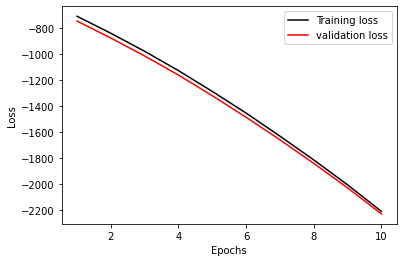

In [97]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
epochs = range(1,11)

plt.plot(epochs, loss_train, 'k', label='Training loss')
plt.plot(epochs, loss_val, 'r', label='validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

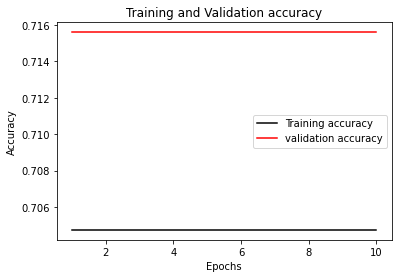

In [98]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']

epochs = range(1,11)

plt.plot(epochs, loss_train, 'k', label='Training accuracy')
plt.plot(epochs, loss_val, 'r', label='validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [111]:
from sklearn.svm import SVC

In [114]:
SVCClf = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)

SVCClf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=False,
    tol=0.001, verbose=False)

In [115]:
y_preds= SVCClf.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Accuracy : ', accuracy_score(y_test, y_preds))

Accuracy :  0.7742830712303422
